In [2]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
from sklearn.datasets import fetch_openml
dataset=fetch_openml("mnist_784")
print(dataset.keys())
print(dataset.DESCR)
dataset

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])
**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing te

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [4]:
x=dataset.data[:800]
y=dataset.target[:800]
trainX,testX,trainY,testY=train_test_split(x,y,test_size=0.2,random_state=12)

In [28]:

kVals = range(2, 30, 1)
testaccuracies = []
trainaccuracies = []

# loop over various values of `k` for the k-Nearest Neighbor classifier

for k in range(2, 30, 1):
          # train the k-Nearest Neighbor classifier with the current value of `k`
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(trainX, trainY)
          # evaluate the model and update the accuracies list
          score1 = model.score(testX, testY)
          score2 = model.score(trainX, trainY)
         
          print("k=%d, test accuracy=%.2f%%" % (k, score1 * 100))
          print("k=%d, train accuracy=%.2f%%" % (k, score2 * 100))
          testaccuracies.append(score1)
          trainaccuracies.append(score2)
          
# find the value of k that has the largest accuracy

itest = np.argmax(testaccuracies)
itrain = np.argmax(trainaccuracies)
print("k=%d achieved highest test accuracy of %.2f%% on validation data" % (kVals[itest],
testaccuracies[itest] * 100))
print("k=%d achieved highest train accuracy of %.2f%% on validation data" % (kVals[itrain],
trainaccuracies[itrain] * 100))

k=2, test accuracy=85.62%
k=2, train accuracy=90.94%
k=3, test accuracy=88.75%
k=3, train accuracy=91.09%
k=4, test accuracy=88.75%
k=4, train accuracy=90.78%
k=5, test accuracy=88.12%
k=5, train accuracy=89.38%
k=6, test accuracy=89.38%
k=6, train accuracy=88.75%
k=7, test accuracy=89.38%
k=7, train accuracy=88.75%
k=8, test accuracy=90.00%
k=8, train accuracy=87.34%
k=9, test accuracy=90.00%
k=9, train accuracy=87.03%
k=10, test accuracy=90.00%
k=10, train accuracy=87.03%
k=11, test accuracy=86.88%
k=11, train accuracy=85.94%
k=12, test accuracy=87.50%
k=12, train accuracy=85.16%
k=13, test accuracy=87.50%
k=13, train accuracy=84.38%
k=14, test accuracy=86.88%
k=14, train accuracy=83.91%
k=15, test accuracy=86.88%
k=15, train accuracy=83.28%
k=16, test accuracy=85.62%
k=16, train accuracy=82.97%
k=17, test accuracy=86.25%
k=17, train accuracy=82.66%
k=18, test accuracy=85.00%
k=18, train accuracy=82.34%
k=19, test accuracy=85.00%
k=19, train accuracy=82.50%
k=20, test accuracy=84.38%

In [32]:
##training the classifier with the best neighbor(k value) test accuracy value

model = KNeighborsClassifier(n_neighbors=kVals[itest])
model.fit(trainX, trainY)
predictions = model.predict(testX)
#print(predictions[1])

# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits

print("EVALUATION ON TESTING DATA")
print(classification_report(testY, predictions))

print ("Confusion matrix")
print(confusion_matrix(testY,predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      0.96      0.89        26
           2       0.86      0.71      0.77        17
           3       0.92      0.92      0.92        13
           4       0.73      0.89      0.80         9
           5       1.00      1.00      1.00        10
           6       1.00      0.95      0.98        21
           7       0.79      1.00      0.88        15
           8       1.00      0.83      0.91        12
           9       0.94      0.77      0.85        22

   micro avg       0.90      0.90      0.90       160
   macro avg       0.91      0.90      0.90       160
weighted avg       0.91      0.90      0.90       160

Confusion matrix
[[15  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  1  0  0]
 [ 0  3 12  1  0  0  0  0  0  1]
 [ 0  0  1 12  0  0  0  0  0  0]
 [ 0  1  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]

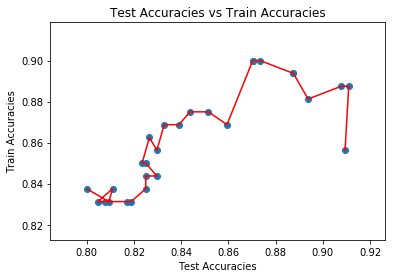

In [33]:
##plotting for all k values

plt.scatter(trainaccuracies,testaccuracies)
plt.plot(trainaccuracies,testaccuracies,c="red")
plt.xlabel("Test Accuracies")
plt.ylabel("Train Accuracies")
plt.title("Test Accuracies vs Train Accuracies")
plt.show()

In [51]:
##using plotly
import plotly
from plotly.offline import plot,iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
traceA = go.Scatter(
   x = trainaccuracies,
   y = testaccuracies,
   marker = dict(color = "crimson", size = 15),
   mode = "lines+markers"
)


layout = go.Layout(
   title = "Test Accuracies vs Train Accuracies",
   xaxis_title = "Test Accuracies",
   yaxis_title = "Train Accuracies"
)
fig = go.Figure([traceA], layout = layout)
iplot(fig)

In [56]:
##same plot with different method

fig = go.Figure()
fig.add_trace(go.Scatter(x=trainaccuracies, y=testaccuracies,marker = dict(color = "olive", size = 15),
                    mode='lines+markers'))
fig.update_layout(title='Test Accuracies vs Train Accuracies',
                   xaxis_title='Test Accuracies',
                   yaxis_title='Train Accuracies')

fig.show()